In [126]:
import sys
import random
import time
import matplotlib.pyplot as plt

#재귀한도를 10000으로 늘린다.
sys.setrecursionlimit(10000)

#A-Z 문자열에서 랜덤으로 생성된 rand_elem의 개수로 구성된 문자열 리스트를 만든다.
def sampling_list(num):
    #영문자 소문자로 지정한다.
    Eng_string = 'abcdefghijklmnopqrstuvwxyz'
    Eng_list = list(Eng_string)
    sample_list = []
    for i in range(num):
        sample_list.append(random.choice(Eng_list))
    return sample_list

#X와 Y의 length는 둘 다 n이다.
#다만 코드 내부에서 X의 길이와 Y의 길이를 다른 변수로 지정해야 했기 때문에 X의 경우 length을 m으로 지정하였다.
#m==n으로, main_go 함수에서 둘 다 동일한 rand_elem값을 할당받는 것을 알 수 있다.
def LCS_Length(X, Y, m, n, b):

    if m == 0 or n == 0:
        return 0

    #값을 저장할 행렬 b에서 값을 찾기 위한 key이다.
    key = (m, n)

    #Top-down, memoized 방식 사용
    if key not in b:
        if X[m - 1] == Y[n - 1]:
            #재귀적으로 접근
            b[key] = LCS_Length(X, Y, m - 1, n - 1, b) + 1

        else:
            b[key] = max(LCS_Length(X, Y, m, n - 1, b),
                              LCS_Length(X, Y, m - 1, n, b))

    return b[key]

#표를 그리는 함수를 지정하였다.
def plotting(x, y):
    x.sort()
    y.sort()
    plt.plot(x,y,'bo-.')
    plt.xlabel('n')
    plt.ylabel('running time')
    plt.title('Average actual running time with various values of n')
    plt.show()

#average_runtime을 구하기 위하여 세 가지 단계를 지정하였다.
#n값이 10부터 99사이일 때 low로, 100부터 499까지 medium으로, 500부터 1000까지 high로 지정하였다.
def runtime():
    main_go()

    if rand_elem >= 10 and rand_elem < 100:
        X_average_low.append(rand_elem)
        Y_average_low.append(end)
    elif rand_elem >= 100 and rand_elem < 500:
        X_average_medium.append(rand_elem)
        Y_average_medium.append(end)
    else:
        X_average_high.append(rand_elem)
        Y_average_high.append(end)

#n이 low, medium, high일 때를 나눠서 n값과 running time을 평균내었다.
def average_runtime():
    global X_low, X_medium, X_high, Y_low, Y_medium, Y_high
    X_low, X_medium, X_high, Y_low, Y_medium, Y_high = 0, 0, 0, 0, 0, 0
    
    for ix in range(len(X_average_low)):
        X_low += X_average_low[ix]
    for jx in range(len(X_average_medium)):
        X_medium += X_average_medium[jx]
    for kx in range(len(X_average_high)):
        X_high += X_average_high[kx]
        
    for iy in range(len(Y_average_low)):
        Y_low += Y_average_low[iy]
    for jy in range(len(Y_average_medium)):
        Y_medium += Y_average_medium[jy]
    for ky in range(len(Y_average_high)):
        Y_high += Y_average_high[ky]
    
    try:
        X_low = X_low / len(X_average_low)
        X_medium = X_medium / len(X_average_medium)
        X_high = X_high / len(X_average_high)
        Y_low = Y_low / len(Y_average_low)
        Y_medium = Y_medium / len(Y_average_medium)
        Y_high = Y_high / len(Y_average_high)
    
    #요소가 부족하여 low, medium, high중에 값이 하나도 할당되지 않은 경우를 대비하였다.
    except ZeroDivisionError:
        pass
    finally:
        X_list.append(X_low)
        X_list.append(X_medium)
        X_list.append(X_high)
        Y_list.append(Y_low)
        Y_list.append(Y_medium)
        Y_list.append(Y_high)

In [142]:
# runtime()으로 실행하지만 runningtime 측정을 위한 것일 뿐,
# main_go()가 메인 메서드이다.
def main_go():
    global rand_elem
    global start
    global end
    
    start = time.time()
    #리스트의 요소 개수 10부터 1000까지 랜덤으로 설정
    
    rand_elem = random.randint(10,1000)
    X = sampling_list(rand_elem)
    Y = sampling_list(rand_elem)

    b = {}

    print("n : ", rand_elem)
    print("X : ",X)
    print("Y : ",Y)
    print("LCS length : ", LCS_Length(X, Y, len(X), len(Y), b))
    
    end = time.time()-start

    print("Running time : ", end)

In [143]:
#필요한 리스트들을 한꺼번에 선언하였다.
X_list = []
Y_list = []
X_average_low = []
X_average_medium = []
X_average_high = []
Y_average_low = []
Y_average_medium = []
Y_average_high = []

In [144]:
#총 10번의 runtime()을 돌렸다.
runtime()

n :  946
X :  ['s', 'f', 'z', 'l', 'n', 'w', 'd', 'u', 'g', 'p', 't', 'q', 's', 'a', 'j', 'w', 'b', 'z', 'a', 'r', 'q', 'b', 'j', 'm', 'm', 'h', 'u', 'd', 'u', 's', 'k', 'w', 'n', 'b', 'f', 's', 'b', 't', 'c', 'i', 'd', 'g', 'y', 'm', 'o', 'l', 'z', 'l', 'f', 'q', 'a', 'z', 'g', 'g', 'v', 't', 'g', 'e', 'x', 'v', 'k', 'b', 'e', 'h', 'i', 'v', 't', 'z', 'h', 'j', 'c', 'j', 'z', 'l', 'x', 'k', 'x', 'z', 'm', 'j', 'x', 'b', 'd', 'a', 'k', 'b', 's', 'i', 'k', 'b', 't', 'i', 'y', 'o', 'a', 's', 'v', 'f', 'r', 'w', 'o', 's', 'z', 'p', 'd', 'a', 'p', 't', 'g', 'l', 'c', 'a', 'c', 'z', 'f', 'o', 'y', 't', 'o', 'n', 'f', 'u', 's', 'a', 'e', 'n', 'r', 'd', 'r', 'g', 'w', 'z', 't', 'i', 'g', 'q', 'a', 'c', 'z', 'p', 'u', 'q', 'u', 'q', 'y', 'w', 'w', 'e', 'b', 'z', 'd', 'w', 'g', 'b', 'k', 'x', 'z', 'l', 'p', 'r', 'o', 'q', 'n', 'v', 'a', 'w', 'x', 'j', 'h', 'c', 'v', 'b', 'n', 'u', 'z', 'o', 'q', 'f', 'j', 'y', 'k', 'p', 'm', 's', 'y', 't', 'r', 'v', 'z', 't', 'g', 'y', 'a', 'a', 'h', 'u', 'l', 

LCS length :  299
Running time :  1.1410305500030518


In [145]:
runtime()

n :  684
X :  ['g', 'o', 'x', 'x', 'p', 'g', 'b', 'b', 'v', 'z', 'b', 'y', 'q', 's', 'd', 'l', 'z', 'p', 'l', 's', 'g', 'm', 'a', 'v', 'i', 'k', 'k', 'h', 'e', 'z', 'd', 'x', 'h', 'z', 'x', 'h', 'a', 'x', 'a', 'i', 'c', 'i', 'n', 'a', 'g', 'v', 'v', 't', 'l', 'a', 'g', 'z', 'z', 'c', 'i', 'v', 'e', 'j', 'm', 'n', 'e', 'r', 'q', 'q', 'g', 'd', 'i', 'z', 't', 'f', 'w', 'l', 'u', 'f', 'n', 'k', 'i', 'o', 'g', 'x', 'u', 'o', 'm', 'g', 'u', 'x', 'd', 'n', 'b', 'b', 'l', 'z', 'h', 'g', 'y', 'c', 'd', 'e', 'n', 'z', 'y', 'p', 'f', 'i', 'n', 'u', 'g', 'w', 'm', 'r', 'v', 'k', 'i', 'o', 'z', 'o', 'n', 'u', 'i', 'h', 'f', 'n', 'd', 'r', 'l', 'h', 'f', 'a', 'b', 'z', 'f', 'i', 'o', 'j', 'o', 'e', 'y', 'y', 'e', 'd', 'u', 'f', 'j', 'o', 'b', 't', 'a', 'l', 'z', 's', 'q', 'o', 'i', 'm', 'w', 'h', 'o', 'm', 'p', 'r', 'w', 'n', 'r', 'r', 'd', 'n', 'p', 'b', 'l', 'a', 'w', 'o', 't', 'k', 'o', 'x', 'n', 'p', 'j', 'h', 'x', 'u', 'd', 'm', 'q', 'd', 'c', 'b', 'b', 'e', 'q', 'v', 'w', 'y', 'p', 'z', 'i', 

In [146]:
runtime()

n :  582
X :  ['z', 'k', 't', 'n', 'f', 'y', 'g', 'z', 'p', 'l', 'k', 'j', 'x', 't', 'b', 'g', 'o', 'n', 'm', 'h', 'd', 'd', 'p', 'y', 't', 'x', 'r', 'k', 'b', 'f', 'l', 'x', 'p', 'u', 'a', 'j', 't', 'r', 't', 'a', 's', 'r', 't', 'w', 'y', 'x', 'k', 'f', 'h', 'r', 'j', 'r', 'v', 's', 'f', 't', 'f', 'q', 'v', 'z', 'c', 'p', 'r', 'l', 'o', 'e', 'f', 'l', 'b', 'o', 'y', 'o', 'k', 'o', 'b', 'd', 'c', 'y', 'd', 'e', 's', 'f', 'w', 'u', 'q', 'm', 'x', 'j', 'e', 'q', 'x', 'g', 'm', 'n', 't', 'n', 'p', 'e', 'k', 'f', 'u', 'b', 'g', 'c', 'k', 'g', 'u', 'n', 'k', 'i', 'e', 'n', 'h', 'c', 'x', 'z', 'u', 's', 'j', 'n', 'b', 'c', 'i', 'z', 'r', 'm', 'f', 'x', 'y', 'h', 'v', 'a', 'u', 'e', 'k', 'q', 'o', 'y', 'f', 'u', 'b', 'z', 'e', 'm', 'q', 'l', 'e', 'a', 'z', 'j', 'c', 'e', 'n', 'y', 'i', 'q', 'u', 'x', 'n', 'i', 'o', 'g', 'c', 'n', 'u', 's', 'q', 'r', 'b', 'w', 'z', 'o', 'l', 'e', 'w', 'a', 'c', 'v', 'v', 'y', 'c', 'd', 'm', 'x', 'y', 'u', 'o', 'b', 'u', 'h', 'q', 'f', 'g', 'v', 'q', 'z', 'f', 

In [147]:
runtime()

n :  163
X :  ['i', 'm', 'q', 'k', 'q', 'w', 'e', 'p', 'x', 'j', 'v', 'e', 'z', 'p', 'b', 'f', 'q', 'c', 'v', 'z', 'j', 'l', 'e', 'h', 'p', 'a', 'c', 'g', 'f', 'b', 'o', 's', 'y', 'm', 'i', 'g', 'o', 'h', 'o', 't', 'f', 'p', 'v', 'r', 'p', 'r', 'o', 'z', 'h', 'b', 'u', 'w', 'u', 'r', 'k', 's', 't', 'q', 'k', 'b', 'r', 'd', 'p', 'b', 'f', 'd', 'e', 'o', 's', 'd', 'q', 'c', 'n', 'k', 'w', 'u', 'w', 'y', 'n', 'i', 's', 'o', 'm', 'p', 'f', 'a', 'e', 'j', 'k', 'u', 'a', 'v', 't', 't', 'e', 'w', 'o', 'e', 'p', 'e', 'w', 'u', 'r', 'b', 't', 'b', 'b', 'f', 'r', 'p', 'u', 'g', 'e', 'c', 'd', 'v', 'i', 'd', 'k', 'y', 'w', 'o', 'q', 't', 'c', 'w', 'b', 'k', 'b', 'c', 'h', 'g', 'x', 'l', 'o', 'i', 'w', 'd', 'p', 'e', 'a', 'j', 'i', 'l', 'c', 'e', 'j', 'd', 't', 's', 'j', 'x', 'a', 'x', 'p', 'h', 'd', 's', 'e', 'y', 'k', 'r', 'p']
Y :  ['h', 'o', 'w', 'k', 'm', 'g', 'x', 'b', 'b', 'h', 'r', 'e', 'g', 't', 'p', 'o', 'p', 'x', 'b', 'j', 'a', 'd', 'k', 'j', 'n', 'w', 'y', 'y', 'a', 'n', 'o', 'e', 't',

In [148]:
runtime()

n :  228
X :  ['w', 'q', 'w', 'a', 'v', 'm', 'x', 'i', 'w', 'y', 'f', 'n', 'a', 'k', 's', 'm', 'g', 'z', 'm', 'x', 'y', 'v', 'v', 'k', 's', 'a', 'k', 'c', 'v', 'j', 's', 'l', 'g', 'u', 'l', 'd', 'w', 'h', 'i', 'z', 'z', 't', 'e', 't', 'e', 'n', 'r', 'w', 'x', 'r', 'a', 'k', 'o', 'c', 's', 'q', 'i', 'd', 'm', 'p', 'z', 'm', 'r', 'b', 'l', 'y', 'z', 'e', 'z', 'c', 'f', 'y', 'r', 't', 'c', 'o', 'j', 'o', 'p', 't', 'c', 'x', 'c', 'n', 'e', 'q', 'l', 't', 'a', 'z', 'd', 'u', 'r', 'm', 'r', 'a', 'a', 'i', 'e', 'm', 'g', 'u', 'x', 'w', 'n', 'o', 'b', 'y', 'm', 'o', 's', 's', 's', 'f', 'b', 'n', 'n', 'l', 'f', 'a', 'u', 'q', 'g', 'l', 'w', 'r', 'd', 'r', 'x', 't', 'w', 'i', 'x', 'e', 'r', 'x', 'n', 'g', 'w', 'e', 'o', 'b', 'm', 's', 'p', 'x', 'r', 'd', 'j', 'm', 'b', 'q', 'u', 'u', 't', 'd', 'g', 'x', 'm', 'p', 'p', 's', 'm', 'g', 'z', 'e', 'r', 'u', 'b', 'y', 'p', 'k', 't', 'j', 't', 'z', 'p', 'd', 'r', 'l', 'n', 'q', 'a', 's', 'j', 'h', 'd', 'i', 'i', 'k', 's', 'q', 'f', 'o', 'i', 'f', 'a', 

In [149]:
runtime()

n :  45
X :  ['k', 'd', 'k', 'v', 'r', 'p', 'm', 'g', 'x', 'p', 'p', 'y', 'v', 's', 'r', 'x', 'z', 'k', 'i', 'a', 'j', 'u', 'p', 'u', 'g', 's', 'i', 'r', 'd', 's', 'j', 't', 'u', 'h', 'c', 'u', 'r', 'v', 'x', 'h', 'e', 'u', 'f', 'm', 'y']
Y :  ['o', 'd', 'x', 'q', 'b', 'r', 'y', 'h', 'u', 'b', 'k', 'f', 'n', 'e', 'c', 'r', 't', 'p', 'e', 'e', 'k', 's', 'k', 'd', 'b', 'm', 'q', 'n', 't', 'd', 'z', 'v', 'c', 'l', 't', 'n', 'h', 'g', 'q', 's', 'o', 't', 'i', 'k', 'v']
LCS length :  10
Running time :  0.002987384796142578


In [150]:
runtime()

n :  501
X :  ['s', 'r', 'a', 'g', 'f', 'v', 'r', 'u', 't', 'w', 'b', 'v', 'g', 'i', 'e', 'x', 'v', 'm', 'b', 's', 'i', 'o', 'e', 'u', 'f', 'y', 'd', 'f', 'y', 'm', 'a', 'v', 'h', 'a', 'y', 'p', 'i', 'p', 'g', 'w', 'v', 'q', 'x', 'r', 'o', 'q', 'e', 'r', 'a', 'v', 'w', 'i', 'y', 'x', 'u', 'b', 'j', 'h', 'j', 'u', 'b', 'd', 'd', 'o', 'n', 'j', 'h', 't', 'y', 'm', 'h', 'w', 'w', 'c', 'q', 'n', 'f', 'l', 'y', 'g', 'g', 'w', 'n', 'q', 'b', 'i', 'o', 'e', 'v', 'q', 'p', 'u', 'q', 'r', 'a', 'l', 'l', 'h', 'f', 'v', 's', 'v', 't', 'v', 'w', 'k', 'k', 'j', 'k', 'o', 'x', 'a', 'v', 'u', 's', 's', 'h', 'v', 'c', 'o', 'e', 'g', 'p', 'q', 'k', 'n', 'd', 'x', 'y', 'z', 's', 'd', 'd', 'r', 'm', 'k', 'f', 'r', 'w', 'u', 'u', 'o', 'a', 's', 'u', 'm', 'd', 'b', 'z', 't', 'a', 'b', 'j', 'g', 'j', 'q', 'o', 'i', 'z', 'o', 'z', 'a', 'o', 'o', 'q', 'r', 'k', 'z', 'k', 'f', 'u', 't', 'n', 'f', 'y', 'w', 'l', 'e', 'g', 'r', 'k', 'c', 'v', 'f', 'm', 't', 'b', 'o', 'q', 'c', 'u', 'k', 'a', 'g', 'c', 'n', 'b', 

In [151]:
runtime()

n :  525
X :  ['l', 'v', 'y', 'm', 'a', 'k', 'g', 'l', 'z', 'o', 'b', 'p', 'd', 'a', 'r', 'w', 's', 'o', 'n', 'd', 'f', 'w', 'h', 'k', 'n', 's', 'h', 'k', 'j', 'q', 'q', 'o', 'x', 'l', 'r', 'p', 'j', 'v', 'h', 'a', 'w', 'z', 'w', 'v', 'm', 'x', 'z', 'a', 'e', 'p', 'm', 'r', 'n', 'p', 'q', 'q', 'm', 'l', 'k', 'm', 'r', 'y', 'j', 'j', 'b', 'n', 'e', 'p', 'p', 'v', 'y', 'v', 'm', 'n', 'f', 't', 'i', 'x', 'w', 'g', 'p', 'o', 'c', 'i', 'l', 'e', 'p', 'z', 'a', 'k', 'u', 'x', 'h', 'o', 'g', 'n', 'n', 't', 'n', 'd', 'a', 'w', 'i', 'k', 'p', 'e', 'x', 'c', 'd', 'c', 'z', 'z', 'm', 'g', 'z', 'z', 'd', 'u', 'a', 'o', 'e', 'n', 'v', 'z', 'o', 'i', 'd', 'b', 'l', 'd', 'i', 'a', 'a', 'o', 'x', 'e', 'd', 'l', 'q', 'x', 'r', 'o', 'v', 'p', 'z', 'x', 'q', 'q', 'w', 'f', 'w', 'g', 'f', 'a', 'k', 'g', 's', 'g', 'c', 'n', 'y', 's', 'y', 'k', 'd', 't', 'i', 'j', 'o', 'e', 'y', 'u', 'l', 'y', 'q', 'a', 'y', 'e', 'p', 'm', 'b', 'e', 'h', 'z', 'q', 'l', 'u', 'y', 'o', 'q', 'j', 'e', 's', 'j', 'f', 'q', 'f', 

In [152]:
runtime()

n :  299
X :  ['z', 't', 'o', 'v', 'n', 'r', 'h', 'f', 'j', 'j', 'r', 'a', 'd', 'j', 'w', 'q', 'p', 'v', 'w', 'x', 'v', 'l', 'l', 'i', 'b', 'f', 'x', 'g', 'g', 'b', 'n', 'x', 'l', 'h', 'y', 'k', 'j', 'f', 'y', 'w', 'l', 'e', 'd', 'r', 'h', 'v', 'n', 'b', 'u', 'n', 'r', 'f', 'k', 'x', 'm', 'l', 'x', 'm', 'd', 'm', 'k', 'q', 'e', 'f', 'k', 'r', 'd', 'm', 'm', 't', 'h', 'i', 'e', 'o', 'e', 'n', 'l', 'i', 't', 'u', 'b', 'd', 'b', 'w', 'r', 'e', 'm', 'f', 'z', 'v', 't', 's', 'p', 'w', 'y', 'w', 'o', 'r', 'y', 'x', 'e', 'k', 'c', 'o', 'f', 'v', 'r', 'h', 'z', 'k', 'h', 'q', 'x', 'e', 'l', 'm', 'm', 'b', 's', 'p', 'j', 'm', 'h', 'f', 'e', 'd', 'z', 'q', 'd', 'y', 'f', 'x', 'o', 'y', 'v', 'c', 'z', 'x', 'm', 'd', 'r', 'r', 'v', 'm', 'x', 'q', 'h', 's', 'g', 'g', 'c', 'e', 'c', 'o', 't', 'j', 'p', 'w', 'b', 's', 'z', 'q', 't', 'e', 'j', 'm', 'x', 'f', 'z', 'q', 'a', 'm', 'i', 'g', 'q', 'l', 'x', 'l', 'n', 'a', 'b', 'x', 's', 'o', 'd', 'b', 'w', 'c', 'x', 'e', 'y', 'x', 'o', 'e', 'a', 'g', 'm', 

In [153]:
runtime()

n :  659
X :  ['z', 'p', 'o', 'e', 'c', 'j', 'v', 'w', 'm', 'k', 'h', 'q', 'z', 'y', 'o', 'z', 'w', 'j', 'r', 'm', 'b', 'v', 'r', 'k', 'i', 'f', 's', 'z', 'b', 'm', 'd', 'h', 'x', 'i', 'o', 'w', 'd', 'q', 'e', 'y', 'x', 'o', 'l', 'd', 'g', 'd', 'v', 'i', 'y', 'e', 's', 'l', 'v', 'o', 'e', 's', 'h', 'n', 'd', 'w', 'e', 'p', 'r', 'j', 'p', 'r', 'c', 'h', 'z', 'l', 'c', 'q', 'g', 'v', 'n', 'q', 't', 'd', 'r', 'l', 'l', 'a', 'm', 'i', 'l', 'k', 'f', 'v', 'f', 'n', 'j', 'o', 'k', 'q', 'u', 'g', 'e', 'z', 'k', 'a', 'e', 'l', 'b', 'v', 'a', 'k', 's', 't', 's', 'd', 'n', 'v', 'y', 'l', 'q', 's', 'e', 'n', 'c', 'r', 'q', 'm', 'y', 'm', 'm', 'u', 'y', 'p', 'b', 'c', 's', 'j', 'n', 'v', 's', 'm', 'c', 'l', 'w', 'm', 'n', 'h', 'j', 'u', 'c', 'k', 'd', 'q', 'p', 'h', 'q', 't', 'm', 'b', 'i', 'x', 'k', 'e', 'r', 'p', 't', 'y', 'n', 'l', 'j', 'e', 'z', 't', 'r', 'j', 'd', 'l', 'w', 'x', 'i', 'n', 'q', 'c', 'c', 'i', 'w', 'q', 'w', 's', 'w', 'w', 'l', 'f', 'j', 'c', 'r', 'l', 'i', 'c', 's', 'b', 'w', 

In [154]:
average_runtime()

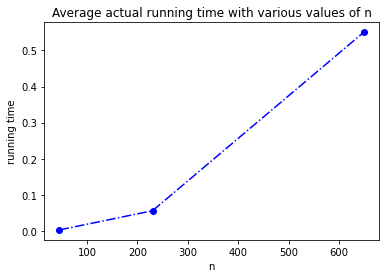

In [155]:
plotting(X_list, Y_list)

In [156]:
print(X_list)
print(Y_list)

[45.0, 230.0, 649.5]
[0.002987384796142578, 0.05619072914123535, 0.550365130106608]
